<a href="https://colab.research.google.com/github/Utsadoa/modeling-examples/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Deep Dive into Video Game Sales Data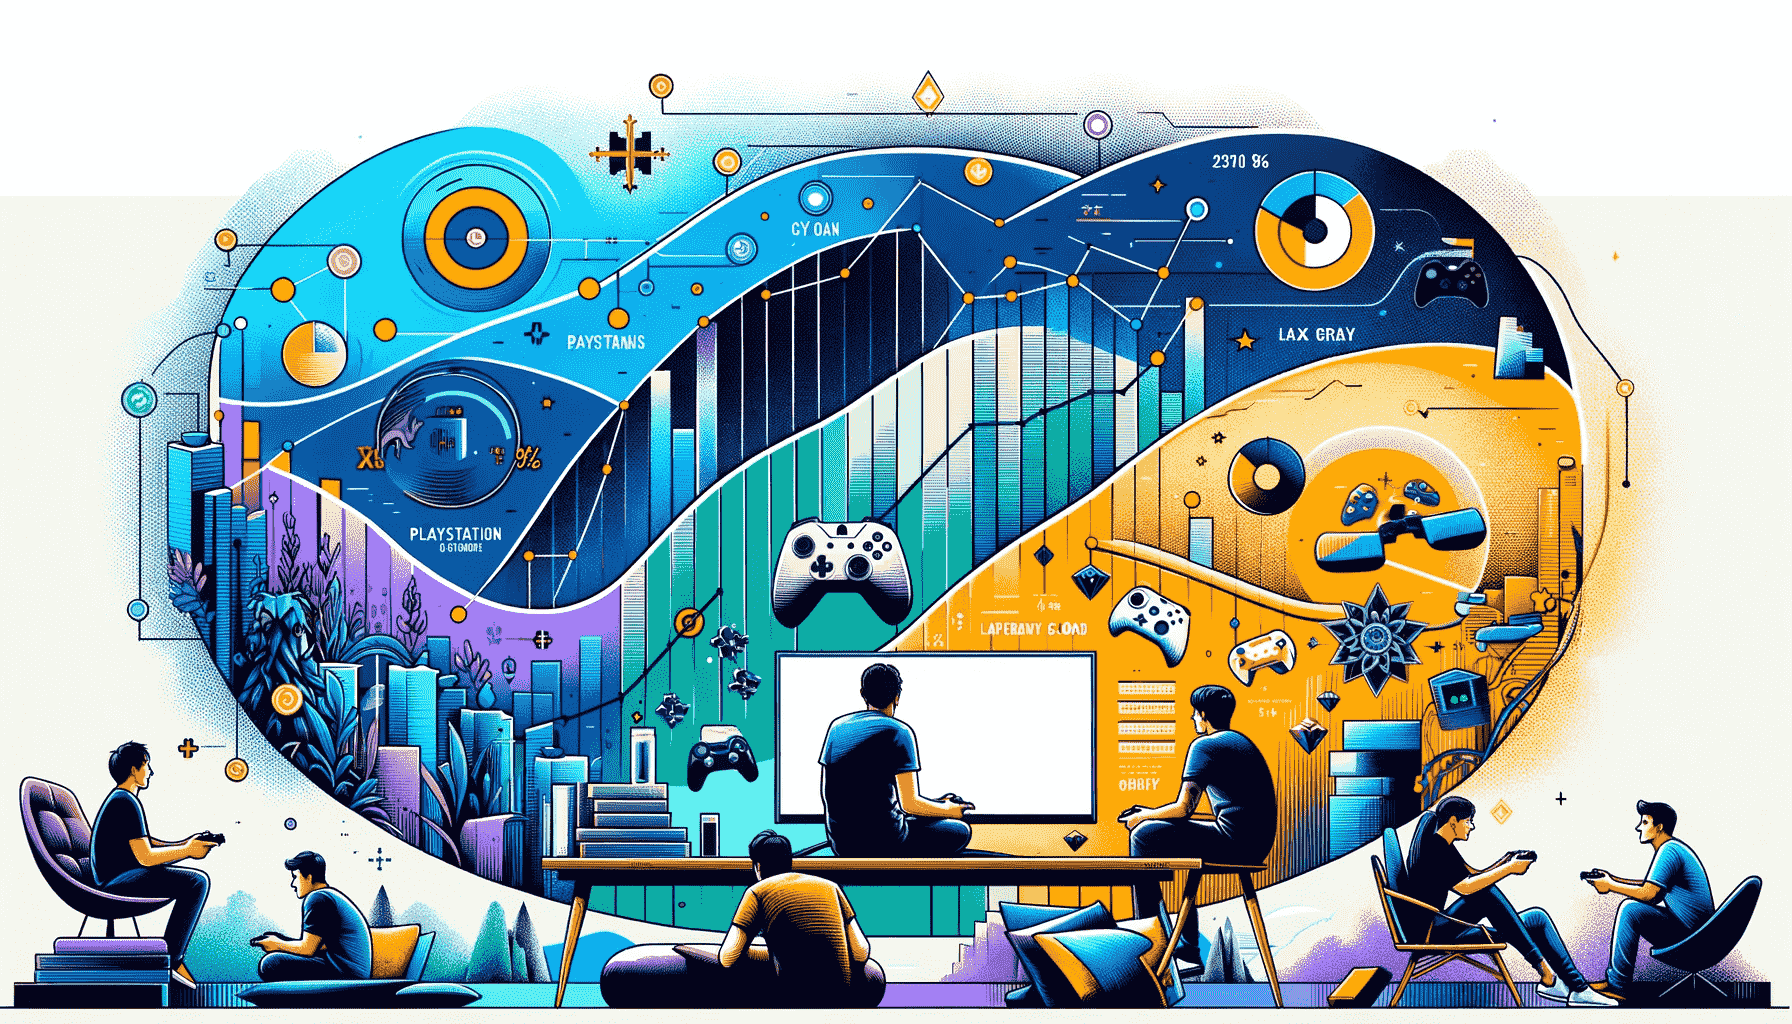

Hello! Welcome to the **My Project** 🎮 <br> This project will help you understand the gaming market's insight, and find out the potential sides of this market. Now, let's start this journey!

You are currently employed by the gaming business as a market analyst. You have the right to view over 15,000 game-related data points, including publisher, platform, sales, and game name.

You can download the CSV file [here](https://drive.google.com/file/d/1BSylf1yXych3atFfAz3IDuNcOVGuOkXm/view?usp=sharing). After that, put it in your Google Drive and change the path to your saved location on Google Drive at the below code cell.

First, please take a look on the explaination of each column in this dataset [here](https://docs.google.com/document/d/1jzZJVPkT7Yr8JUnQ3ZJUK8K4ihy632WqCNVefLU93XE/edit?usp=sharing).

# Preparation & Cleaning Data

####1. Import relevant libraries

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

####2. Overview of the dataset

First, we have a look at the data frame overview.

In [ ]:
pd.options.display.max_columns = None

In [ ]:
# Import data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('vgsales.csv')
df

Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.shape

(16598, 11)

This dataset contains 16,598 rows and 11 columns

Next, we will ascertain the type of data present in each column and provide a summary of the distribution of null values across all columns.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16598 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


This dataset contains the following data types:
- Number: `int64`, `float64`
- String: `object`

Besides, there are 2 columns that have null values:
- Year
- Publisher


#### 3. Remove unwanted data

There are 3 columns that we do need for our analysis:
- Genre
- Publisher
- Name


In [11]:
# Get the name of all columns
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [18]:
# We first get the length of list and then minus to 1 to get the position of the column
print(f'Length of the list: {len(df.columns)}')
print(f'Name of the first unneccessary column: {df.columns[len(df.columns) - 1]}')


Length of the list: 10
Name of the first unneccessary column: Other_Sales


In [19]:
# Execute the drop function
df.drop(columns=['Global_Sales'],inplace = True)


KeyError: "['Global_Sales'] not found in axis"

#### 4. Deal with missing values

Even though we frequently utilize the drop function to cope with missing data, you shouldn't think of that as your first option. Before taking any further action, the most crucial thing you should know is how your data is understood.
Let's look at the columns that have values missing:




In [21]:
# Give all the null data
df.isna().sum()

Rank             0
Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64